# 데이터 정제

In [1]:
# get dummies 는 정제 이후 하기 
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [5]:
import matplotlib
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)
%matplotlib inline

In [7]:
df_raw = pd.read_csv('FITNESS_정제.csv', encoding = 'euc-kr')
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH
0,Donna,여성,42,40대,68.15,59.571,8.17 SEC,166,40,172,1976-04-05
1,Gracie,NaN,38,30대,81.87,60.055,8.63 SEC,170,48,186,1986-09-06
2,Luanne,여성,43,40대,85.84,54.297,8.65 SEC,156,45,168,1978-04-07
3,Mimi,여성,50,50대,70.87,54.625,8.92 SEC,146,48,155,1966-08-08
4,Chris,남성,49,40대,NaN,49.156,8.95 SEC,180,44,185,1977-02-09


In [9]:
# 결측치 확인
df_raw.isnull().sum()

NAME        0
GENDER      1
AGE         0
AGEGROUP    0
WEIGHT      2
OXY         0
RUNTIME     0
RUNPULSE    0
RSTPULSE    0
MAXPULSE    0
BIRTH       0
dtype: int64

In [11]:
# 문자형 결측치 확인 
# gender 결측치를 여성으로 확인
df_raw['GENDER'].fillna("여성", inplace = True)
df_raw.head()

C:\Users\campus4D037\AppData\Local\Temp\ipykernel_28596\2270708494.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_raw['GENDER'].fillna("여성", inplace = True)


,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH
0,Donna,여성,42,40대,68.15,59.571,8.17 SEC,166,40,172,1976-04-05
1,Gracie,여성,38,30대,81.87,60.055,8.63 SEC,170,48,186,1986-09-06
2,Luanne,여성,43,40대,85.84,54.297,8.65 SEC,156,45,168,1978-04-07
3,Mimi,여성,50,50대,70.87,54.625,8.92 SEC,146,48,155,1966-08-08
4,Chris,남성,49,40대,NaN,49.156,8.95 SEC,180,44,185,1977-02-09


In [13]:
# 숫자형 결측치 확인 weight의 평균으로 대치
df_raw.groupby('GENDER')['WEIGHT'].agg('mean')

GENDER
남성    82.426923
여성    72.908750
Name: WEIGHT, dtype: float64

In [15]:
# 숫자형 결측치 weight로 대치
df_raw['WEIGHT'] = df_raw['WEIGHT'].fillna(df_raw.groupby('GENDER')['WEIGHT'].transform('mean')).round(3)
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH
0,Donna,여성,42,40대,68.150,59.571,8.17 SEC,166,40,172,1976-04-05
1,Gracie,여성,38,30대,81.870,60.055,8.63 SEC,170,48,186,1986-09-06
2,Luanne,여성,43,40대,85.840,54.297,8.65 SEC,156,45,168,1978-04-07
3,Mimi,여성,50,50대,70.870,54.625,8.92 SEC,146,48,155,1966-08-08
4,Chris,남성,49,40대,82.427,49.156,8.95 SEC,180,44,185,1977-02-09


In [23]:
# 단위와 같이 표현되어 있는 수치형 변수 처리
df_raw[['RUNTIME','RUNTIME_UNIT']] = df_raw['RUNTIME'].str.split('', expand = True)
df_raw['RUNTIME'] = df_raw['RUNTIME'].astype('float64')
# 이미 str로 바뀌었는데 또 실행해서 오류뜨는 거

AttributeError: Can only use .str accessor with string values!

<Axes: >

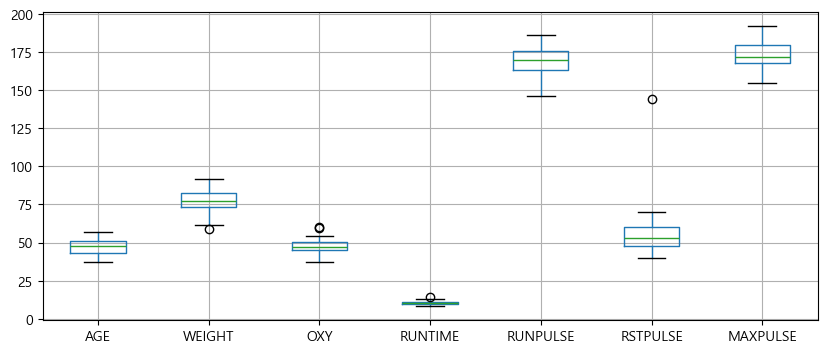

In [19]:
# box PLOT
df_raw.boxplot(figsize = (10,4))

In [25]:
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH,RUNTIME_UNIT
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172,1976-04-05,SEC
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186,1986-09-06,SEC
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168,1978-04-07,SEC
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155,1966-08-08,SEC
4,Chris,남성,49,40대,82.427,49.156,8.95,180,44,185,1977-02-09,SEC


In [41]:
# RSTPULSE 변수에서 이상치 확인 T/F 표시
df_raw['RSTPULSE'] >= 100
df_raw.loc[27:29]

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH,RUNTIME_UNIT
27,Mark,남성,57,50대,73.37,39.407,12.63,174,58,176,1968-05-02,SEC
28,Steve,남성,54,50대,91.63,39.203,12.88,168,144,172,1969-11-03,SEC
29,Vaughn,남성,44,40대,81.42,39.442,13.08,174,63,176,1976-12-04,SEC


In [33]:
# 해당자료 확인
df_raw[(df_raw['RSTPULSE'] >= 100)]

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH,RUNTIME_UNIT
28,Steve,남성,54,50대,91.63,39.203,12.88,168,144,172,1969-11-03,SEC


In [49]:
# 위 이상치 제거
df_fitness = df_raw[df_raw['RSTPULSE'] < 100]
df_fitness
# index 28 제거

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH,RUNTIME_UNIT
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172,1976-04-05,SEC
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186,1986-09-06,SEC
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168,1978-04-07,SEC
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155,1966-08-08,SEC
4,Chris,남성,49,40대,82.427,49.156,8.95,180,44,185,1977-02-09,SEC
5,Allen,남성,38,30대,89.020,49.874,9.22,178,55,180,1988-12-10,SEC
6,Nancy,여성,49,40대,76.320,48.673,9.40,186,56,188,1977-06-11,SEC
7,Patty,여성,52,50대,76.320,45.441,9.63,164,48,166,1969-05-12,SEC
8,Suzanne,여성,57,50대,59.080,50.545,9.93,148,49,155,1964-11-13,SEC
9,Teresa,여성,51,50대,77.910,46.672,10.00,162,48,168,1966-04-14,SEC


In [51]:
# DB재구성
df_fitness.reset_index(drop = True, inplace = True)
df_fitness

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH,RUNTIME_UNIT
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172,1976-04-05,SEC
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186,1986-09-06,SEC
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168,1978-04-07,SEC
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155,1966-08-08,SEC
4,Chris,남성,49,40대,82.427,49.156,8.95,180,44,185,1977-02-09,SEC
5,Allen,남성,38,30대,89.020,49.874,9.22,178,55,180,1988-12-10,SEC
6,Nancy,여성,49,40대,76.320,48.673,9.40,186,56,188,1977-06-11,SEC
7,Patty,여성,52,50대,76.320,45.441,9.63,164,48,166,1969-05-12,SEC
8,Suzanne,여성,57,50대,59.080,50.545,9.93,148,49,155,1964-11-13,SEC
9,Teresa,여성,51,50대,77.910,46.672,10.00,162,48,168,1966-04-14,SEC


In [55]:
# 일자속성변환 및 파생변수 생성
df_fitness['BIRTH'] = pd.to_datetime(df_fitness['BIRTH'], format = '%Y-%m-%d')
df_fitness['YEAR'] = df_fitness['BIRTH'].dt.year
df_fitness['MONTH'] = df_fitness['BIRTH'].dt.month
df_fitness['DAY'] = df_fitness['BIRTH'].dt.day
df_fitness['WEEKDAY'] = df_fitness['BIRTH'].dt.weekday
df_fitness.head()

C:\Users\campus4D037\AppData\Local\Temp\ipykernel_28596\1207627691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fitness['BIRTH'] = pd.to_datetime(df_fitness['BIRTH'], format = '%Y-%m-%d')
C:\Users\campus4D037\AppData\Local\Temp\ipykernel_28596\1207627691.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fitness['YEAR'] = df_fitness['BIRTH'].dt.year
C:\Users\campus4D037\AppData\Local\Temp\ipykernel_28596\1207627691.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH,RUNTIME_UNIT,YEAR,MONTH,DAY,WEEKDAY
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172,1976-04-05,SEC,1976,4,5,0
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186,1986-09-06,SEC,1986,9,6,5
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168,1978-04-07,SEC,1978,4,7,4
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155,1966-08-08,SEC,1966,8,8,0
4,Chris,남성,49,40대,82.427,49.156,8.95,180,44,185,1977-02-09,SEC,1977,2,9,2


In [57]:
# 분석에 필요하지 않은 변수 제외
df_fitness = df_fitness.drop(['NAME', 'BIRTH' , 'RUNTIME_UNIT'],axis = 1)
df_fitness.head()

,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,YEAR,MONTH,DAY,WEEKDAY
0,여성,42,40대,68.150,59.571,8.17,166,40,172,1976,4,5,0
1,여성,38,30대,81.870,60.055,8.63,170,48,186,1986,9,6,5
2,여성,43,40대,85.840,54.297,8.65,156,45,168,1978,4,7,4
3,여성,50,50대,70.870,54.625,8.92,146,48,155,1966,8,8,0
4,남성,49,40대,82.427,49.156,8.95,180,44,185,1977,2,9,2


In [59]:
# 범주형 변수의 Dummy 변수화
df_fitness_dummy = pd.get_dummies(df_fitness,drop_first = True)
df_fitness_dummy.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,YEAR,MONTH,DAY,WEEKDAY,GENDER_여성,AGEGROUP_40대,AGEGROUP_50대
0,42,68.150,59.571,8.17,166,40,172,1976,4,5,0,True,True,False
1,38,81.870,60.055,8.63,170,48,186,1986,9,6,5,True,False,False
2,43,85.840,54.297,8.65,156,45,168,1978,4,7,4,True,True,False
3,50,70.870,54.625,8.92,146,48,155,1966,8,8,0,True,False,True
4,49,82.427,49.156,8.95,180,44,185,1977,2,9,2,False,True,False


In [61]:
# Scale 변환 평균-표준편차 척도
# 평균 0 표편 1 인 데이터로 변환
df_scale_std = StandardScaler()
df_scale_std = df_scale_std.fit_transform(df_fitness_dummy)

In [63]:
df_scale_std = pd.DataFrame(df_scale_std, columns = df_fitness_dummy.columns)
df_scale_std.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,YEAR,MONTH,DAY,WEEKDAY,GENDER_여성,AGEGROUP_40대,AGEGROUP_50대
0,-0.805985,-1.119366,2.334717,-1.771826,-0.361066,-1.856653,-0.200185,-0.008206,-0.814663,-1.233538,-1.415684,0.935414,1.069045,-0.707107
1,-1.506841,0.607422,2.429494,-1.423469,0.029276,-0.777726,1.328503,1.222750,0.606261,-1.116799,1.082582,0.935414,-0.935414,-0.707107
2,-0.630771,1.107082,1.301962,-1.408323,-1.336919,-1.182324,-0.636953,0.237985,-0.814663,-1.000061,0.582929,0.935414,1.069045,-0.707107
3,0.595728,-0.777029,1.366191,-1.203852,-2.312773,-0.777726,-2.056450,-1.239163,0.322076,-0.883322,-1.415684,0.935414,-0.935414,1.414214
4,0.420514,0.677525,0.295251,-1.181133,1.005129,-1.317190,1.219311,0.114889,-1.383032,-0.766583,-0.416378,-1.069045,1.069045,-0.707107


In [65]:
# Scale 변화 결과 확인 요약 통계량
df_scale_desc = df_scale_std.describe()
df_scale_desc.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,YEAR,MONTH,DAY,WEEKDAY,GENDER_여성,AGEGROUP_40대,AGEGROUP_50대
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,-0.000,0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,0.000
std,1.017,1.017,1.017,1.017,1.017,1.017,1.017,1.017,1.017,1.017,1.017,1.017,1.017,1.017
min,-1.682,-2.261,-2.009,-1.772,-2.313,-1.857,-2.056,-1.608,-1.667,-1.700,-1.416,-1.069,-0.935,-0.707
25%,-0.631,-0.494,-0.486,-0.609,-0.703,-0.778,-0.637,-0.808,-0.815,-0.854,-0.916,-1.069,-0.935,-0.707
50%,0.158,-0.020,-0.122,-0.083,0.029,-0.171,-0.200,-0.008,-0.388,-0.008,-0.416,0.935,-0.935,-0.707
75%,0.771,0.678,0.511,0.491,0.615,0.672,0.673,0.361,1.033,0.839,1.083,0.935,1.069,1.414
max,1.822,1.836,2.429,2.666,1.591,2.189,1.984,1.838,1.459,1.685,1.582,0.935,1.069,1.414


In [67]:
# scale 변환 최소-최대값 척도 기준
# 최소값 0 최대값 1인 데이터로 변환
df_scale_minmax = MinMaxScaler().fit_transform(df_fitness_dummy)
df_scale_minmax = pd.DataFrame(df_scale_minmax, columns = df_fitness_dummy.columns)
df_scale_minmax.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,YEAR,MONTH,DAY,WEEKDAY,GENDER_여성,AGEGROUP_40대,AGEGROUP_50대
0,0.25,0.278648,0.978647,0.000000,0.50,0.000000,0.459459,0.464286,0.272727,0.137931,0.000000,1.0,1.0,0.0
1,0.05,0.700154,1.000000,0.078498,0.60,0.266667,0.837838,0.821429,0.727273,0.172414,0.833333,1.0,0.0,0.0
2,0.30,0.822120,0.745974,0.081911,0.25,0.166667,0.351351,0.535714,0.272727,0.206897,0.666667,1.0,1.0,0.0
3,0.65,0.362212,0.760445,0.127986,0.00,0.266667,0.000000,0.107143,0.636364,0.241379,0.000000,1.0,0.0,1.0
4,0.60,0.717266,0.519169,0.133106,0.85,0.133333,0.810811,0.500000,0.090909,0.275862,0.333333,0.0,1.0,0.0


In [71]:
df_scale_desc = df_scale_minmax.describe()
df_scale_desc.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,YEAR,MONTH,DAY,WEEKDAY,GENDER_여성,AGEGROUP_40대,AGEGROUP_50대
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,0.480,0.552,0.453,0.399,0.592,0.459,0.509,0.467,0.533,0.502,0.472,0.533,0.467,0.333
std,0.290,0.248,0.229,0.229,0.261,0.251,0.252,0.295,0.325,0.300,0.339,0.507,0.507,0.479
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.300,0.431,0.343,0.262,0.412,0.267,0.351,0.232,0.273,0.250,0.167,0.000,0.000,0.000
50%,0.525,0.547,0.425,0.381,0.600,0.417,0.459,0.464,0.409,0.500,0.333,1.000,0.000,0.000
75%,0.700,0.717,0.568,0.510,0.750,0.625,0.676,0.571,0.864,0.750,0.833,1.000,1.000,1.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [73]:
# scale 변환 로버스트 척도
# 중앙값이 0인 데이터로 변환
df_scale_robust = RobustScaler().fit_transform(df_fitness_dummy)
df_scale_robust = pd.DataFrame(df_scale_robust, columns = df_fitness_dummy.columns)
df_scale_robust.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,YEAR,MONTH,DAY,WEEKDAY,GENDER_여성,AGEGROUP_40대,AGEGROUP_50대
0,-0.6875,-0.938037,2.463797,-1.535284,-0.296296,-1.162791,0.000000,0.000000,-0.230769,-0.724138,-0.50,0.0,1.0,0.0
1,-1.1875,0.535331,2.558834,-1.218589,0.000000,-0.418605,1.166667,1.052632,0.538462,-0.655172,0.75,0.0,0.0,0.0
2,-0.5625,0.961662,1.428207,-1.204819,-1.037037,-0.697674,-0.333333,0.210526,-0.230769,-0.586207,0.50,0.0,1.0,0.0
3,0.3125,-0.645941,1.492612,-1.018933,-1.777778,-0.418605,-1.416667,-1.052632,0.384615,-0.517241,-0.50,0.0,0.0,1.0
4,0.1875,0.595146,0.418733,-0.998279,0.740741,-0.790698,1.083333,0.105263,-0.538462,-0.448276,0.00,-1.0,1.0,0.0


In [75]:
df_scale_desc = df_scale_robust.describe()
df_scale_desc.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,YEAR,MONTH,DAY,WEEKDAY,GENDER_여성,AGEGROUP_40대,AGEGROUP_50대
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,-0.112,0.017,0.123,0.076,-0.022,0.118,0.153,0.007,0.210,0.005,0.208,-0.467,0.467,0.333
std,0.726,0.868,1.020,0.925,0.772,0.702,0.776,0.870,0.551,0.601,0.509,0.507,0.507,0.479
min,-1.312,-1.912,-1.892,-1.535,-1.778,-1.163,-1.417,-1.368,-0.692,-1.000,-0.500,-1.000,0.000,0.000
25%,-0.562,-0.405,-0.365,-0.478,-0.556,-0.419,-0.333,-0.684,-0.231,-0.500,-0.250,-1.000,0.000,0.000
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.438,0.595,0.635,0.522,0.444,0.581,0.667,0.316,0.769,0.500,0.750,0.000,1.000,1.000
max,1.188,1.583,2.559,2.499,1.185,1.628,1.667,1.579,1.000,1.000,1.000,0.000,1.000,1.000


In [81]:
# 표준화 결과 집합 및 비교
df_rstpulse = pd.DataFrame()
df_rstpulse['RAW'] = df_fitness_dummy['RSTPULSE']
df_rstpulse['STANDARD'] = df_scale_std['RSTPULSE']
df_rstpulse['MINMAX'] = df_scale_minmax['RSTPULSE']
df_rstpulse['Robust'] = df_scale_robust['RSTPULSE']
df_rstpulse.head().round(3)

,RAW,STANDARD,MINMAX,Robust
0,40,-1.857,0.000,-1.163
1,48,-0.778,0.267,-0.419
2,45,-1.182,0.167,-0.698
3,48,-0.778,0.267,-0.419
4,44,-1.317,0.133,-0.791


In [83]:
df_rstpulse.head().round(3)

,RAW,STANDARD,MINMAX,Robust
0,40,-1.857,0.000,-1.163
1,48,-0.778,0.267,-0.419
2,45,-1.182,0.167,-0.698
3,48,-0.778,0.267,-0.419
4,44,-1.317,0.133,-0.791


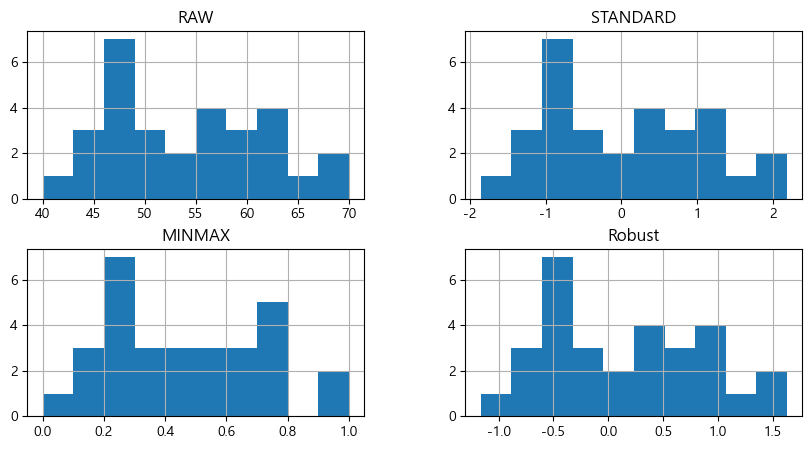

In [87]:
# 각 표본통계 값 histogram화
df_rstpulse[['RAW','STANDARD','MINMAX','Robust']].hist(figsize = (10,5));